In [1]:
#Her dizüstü bilgisayar aşağıdaki üç satırla başlar; 
#yaptığınız kitaplıklarda yapılan düzenlemelerin buraya 
#otomatik olarak yeniden yüklenmesini ve görüntülenen grafiklerin 
#veya resimlerin bu not defterinde gösterilmesini sağlarlar.
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
#Toplu komut dosyasını tanımlayalım
bs = 64

In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/home/nourpc/.fastai/data/oxford-iiit-pet')

In [11]:
path.ls()

[PosixPath('/home/nourpc/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/nourpc/.fastai/data/oxford-iiit-pet/annotations')]

In [13]:
path_anno = path/'annotations'
path_img = path/'images'

#get the file name 
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/nourpc/.fastai/data/oxford-iiit-pet/images/Siamese_141.jpg'),
 PosixPath('/home/nourpc/.fastai/data/oxford-iiit-pet/images/Birman_23.jpg'),
 PosixPath('/home/nourpc/.fastai/data/oxford-iiit-pet/images/samoyed_90.jpg'),
 PosixPath('/home/nourpc/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_173.jpg'),
 PosixPath('/home/nourpc/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_124.jpg')]

In [14]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [15]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

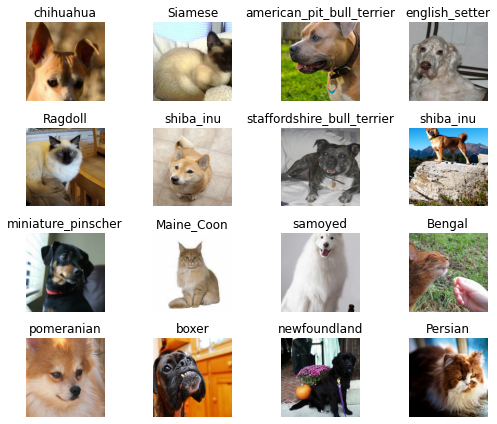

In [17]:
data.show_batch(rows=4, figsize=(7,6))

In [18]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [21]:
len(data.classes), data.c

(37, 37)

In [25]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [26]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.394993,0.349167,0.106901,02:20
1,0.608329,0.321340,0.094046,02:18
2,0.383362,0.267189,0.075778,02:14
3,0.273476,0.255291,0.068336,02:20


In [28]:
learn.save('model-1')

In [30]:
interpretation = ClassificationInterpretation.from_learner(learn)
losses,idxs = interpretation.top_losses()

In [31]:
len(data.valid_ds) == len(losses) == len(idxs)

True

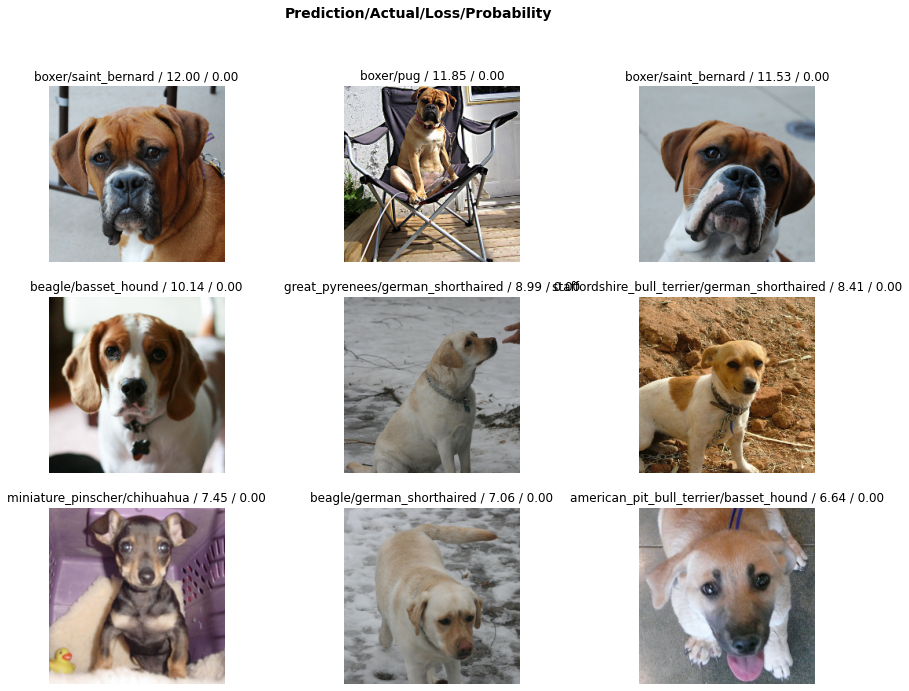

In [32]:
interpretation.plot_top_losses(9, figsize=(15,11))

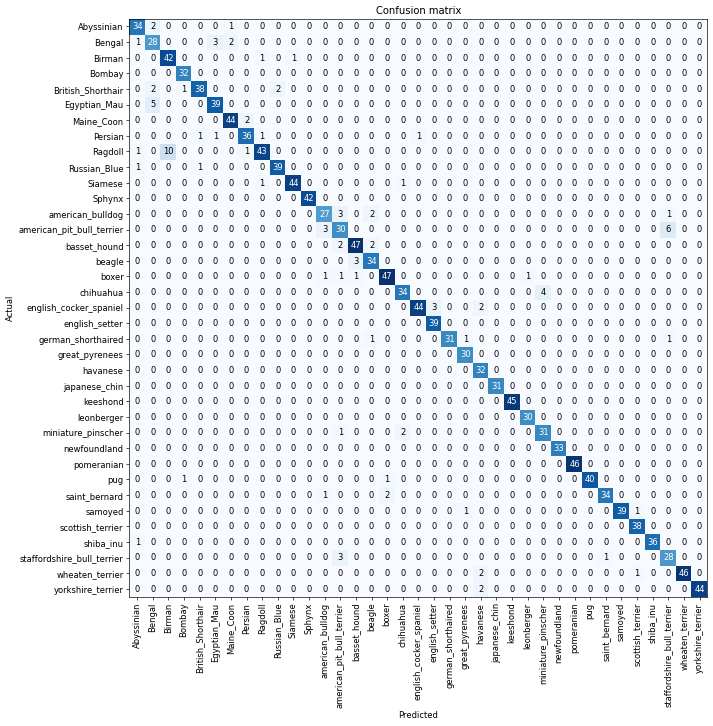

In [35]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [39]:
interpretation.most_confused(min_val=2)

[('Ragdoll', 'Birman', 10),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 5),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('beagle', 'basset_hound', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Bengal', 'Maine_Coon', 2),
 ('British_Shorthair', 'Bengal', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Persian', 2),
 ('american_bulldog', 'beagle', 2),
 ('basset_hound', 'american_pit_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('english_cocker_spaniel', 'havanese', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('saint_bernard', 'boxer', 2),
 ('wheaten_terrier', 'havanese', 2),
 ('yorkshire_terrier', 'havanese', 2)]

In [47]:
learn.load('model-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,Birman,samoyed,wheaten_terrier,Egyptian_Mau
Path: /home/nourpc/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samoyed,saint_bernard,american_bulldog,Maine_Coon,american_pit_bull_terrier
Path: /home/nourpc/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64

In [48]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


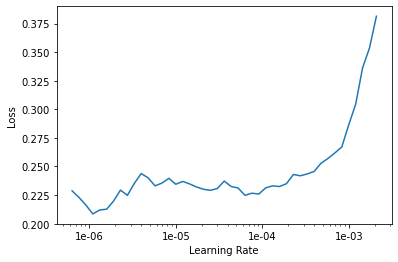

In [49]:
learn.recorder.plot()

In [50]:
learn.unfreeze()

In [51]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.233931,0.256677,0.071042,02:57
1,0.214859,0.248215,0.072395,03:02


In [ ]:
#Bu, yaklaşık 93% toplam doğruluk olan bir model, oldukça iyi bir yaklasım